In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [10]:
df = pd.read_csv(r"C:\Users\Owner\OneDrive\Documents\data_science\fpl_data_1819.csv")
df.head()

,Player,Pos,Squad,Min,Mn/MP,90s,Subs,Gls,Sh,SoT,...,CrdY,CrdR,Fls,Off,OG,Recov,total_points,CBI,PK_miss,succ_tackle
0,Patrick van Aanholt,DF,Crystal Palace,3195.0,89.0,35.5,0,3,44,12,...,3,0,12,11,0,331,140,201,0,18
1,Sergio Agüero,FW,Manchester City,2459.0,75.0,27.3,2,21,118,41,...,4,0,22,26,0,129,201,31,0,11
2,Nathan Aké,DF,Bournemouth,3411.0,90.0,37.9,0,4,22,8,...,3,0,28,2,0,353,120,339,0,14
3,Marc Albrighton,FW,Leicester City,1625.0,60.0,18.1,9,2,19,7,...,3,0,10,2,0,157,63,71,0,9
4,Toby Alderweireld,DF,Tottenham,2922.0,86.0,32.5,1,0,17,6,...,3,0,10,1,1,356,107,241,0,5


In [71]:
cols_to_use = ['90s','xA','xG','Recov','CrsPA','succ_tackle']
X = df[cols_to_use]
y = df.total_points

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [73]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
lm.score(X_train, y_train)

0.9229372890621198

In [75]:
pred_score = lm.predict(X_test)

In [76]:
print(mean_absolute_error(y_test, pred_score))

11.348712712791283


In [60]:
df_1920 = pd.read_csv(r'C:\Users\Owner\OneDrive\Documents\data_science\szn_data_1920.csv', encoding='Windows-1252')

In [61]:
df_1920.head()

,Player,Pos,90s,xA,xG,Recov,CrsPA,Tkl,TklW
0,Patrick van Aanholt\Patrick-van-Aanholt,DF,27.9,3.1,2.3,243.0,5.0,51.0,32
1,Max Aarons\Max-Aarons,DF,36.0,3.4,0.5,281.0,13.0,64.0,36
2,Tammy Abraham\Tammy-Abraham,FW,24.6,2.6,14.5,95.0,0.0,14.0,10
3,Che Adams\Che-Adams,FW,12.3,1.3,4.2,73.0,0.0,8.0,6
4,Adrián\Adrian,GK,9.7,0.0,0.0,47.0,0.0,0.0,0


In [62]:
df_1920['succ_tackle'] = df_1920['TklW'] - (df_1920['Tkl'] - df_1920['TklW'])

In [67]:
df_1920.drop(df_1920[df_1920['Pos'] == 'GK'].index, inplace=True)
df_1920.drop(['Tkl', 'TklW'], axis=1, inplace=True)

In [69]:
df_1920.Player = df_1920.Player.str.split(pat="\\", n=1).str[0]

In [91]:
df_1920.fillna(0, inplace=True)

In [95]:
df_1920['pred_score'] = lm.predict(df_1920[['90s', 'xA', 'xG', 'Recov', 'CrsPA', 'succ_tackle']])

In [96]:
df_1920

,Player,Pos,90s,xA,xG,Recov,CrsPA,succ_tackle,pred_score
0,Patrick van Aanholt,DF,27.9,3.1,2.3,243.0,5.0,13.0,102.087365
1,Max Aarons,DF,36.0,3.4,0.5,281.0,13.0,8.0,114.737121
2,Tammy Abraham,FW,24.6,2.6,14.5,95.0,0.0,6.0,150.579851
3,Che Adams,FW,12.3,1.3,4.2,73.0,0.0,4.0,60.590156
5,Sergio Agüero,FW,16.1,2.4,13.8,61.0,0.0,3.0,127.104024
...,...,...,...,...,...,...,...,...,...
517,Wilfried Zaha,MFFW,36.4,3.3,5.3,232.0,14.0,17.0,131.405349
518,Christoph Zimmermann,DF,15.9,0.1,0.3,146.0,0.0,11.0,40.766582
519,Oleksandr Zinchenko,DF,14.2,1.7,0.4,155.0,11.0,4.0,50.735915
520,Richairo Živkovi?,FW,1.2,0.2,0.0,2.0,1.0,2.0,2.947859


In [152]:
df_1920.sort_values(by=['pred_score'], ascending=False)[df_1920['Pos']=='DF'].head(50)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Player,Pos,90s,xA,xG,Recov,CrsPA,succ_tackle,pred_score
10,Trent Alexander-Arnold,DF,35.3,9.7,2.9,352.0,30.0,-8.0,180.057708
390,Andrew Robertson,DF,34.6,7.2,1.6,340.0,27.0,4.0,147.547397
110,Lucas Digne,DF,33.7,5.7,1.5,363.0,24.0,-9.0,144.752082
28,César Azpilicueta,DF,35.9,5.7,2.7,380.0,28.0,20.0,139.961471
111,Virgil van Dijk,DF,38.0,1.3,2.7,505.0,0.0,10.0,136.896899
446,Enda Stevens,DF,37.2,4.5,1.2,341.0,10.0,10.0,133.109959
124,Lewis Dunk,DF,35.9,1.1,4.2,410.0,0.0,13.0,129.824052
455,James Tarkowski,DF,38.0,2.0,2.3,442.0,0.0,26.0,125.455610
131,Jonny Evans,DF,37.6,0.6,2.6,434.0,1.0,14.0,122.384390
278,Harry Maguire,DF,38.0,0.5,2.0,435.0,0.0,10.0,121.828896


In [136]:
num_features = df.select_dtypes(include=['int64', 'float64'])

In [142]:
no_mins = num_features.drop(['Min','Mn/MP','90s'], axis=1)
correlation = no_mins.corr()

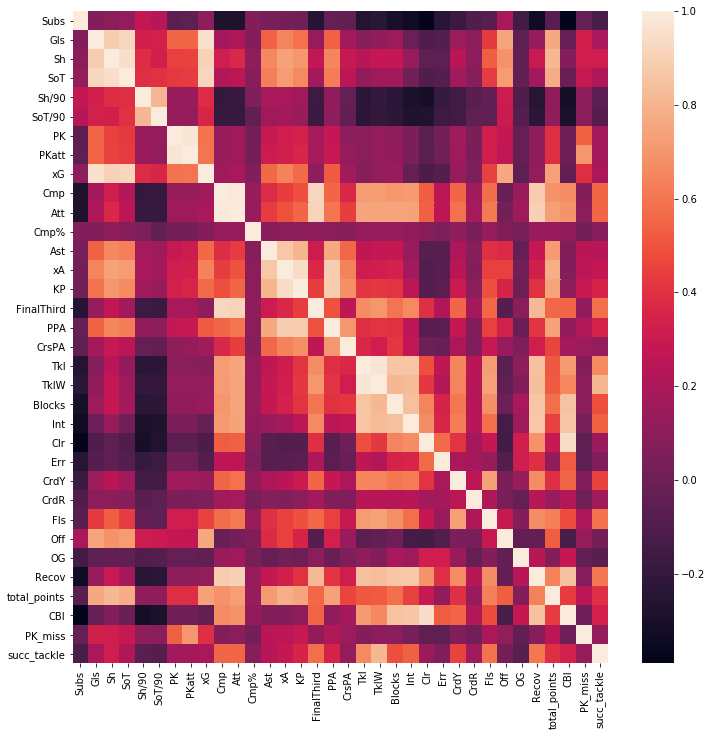

In [143]:
plt.figure(figsize=(12,12))
sns.heatmap(data=correlation)

Index(['total_points', 'Sh', 'xA', 'SoT', 'Gls', 'KP', 'xG', 'PPA', 'Att',
       'Ast', 'Cmp', 'Recov', 'Fls', 'Blocks', 'FinalThird', 'Off', 'TklW',
       'Tkl', 'CrsPA', 'Int'],
      dtype='object')


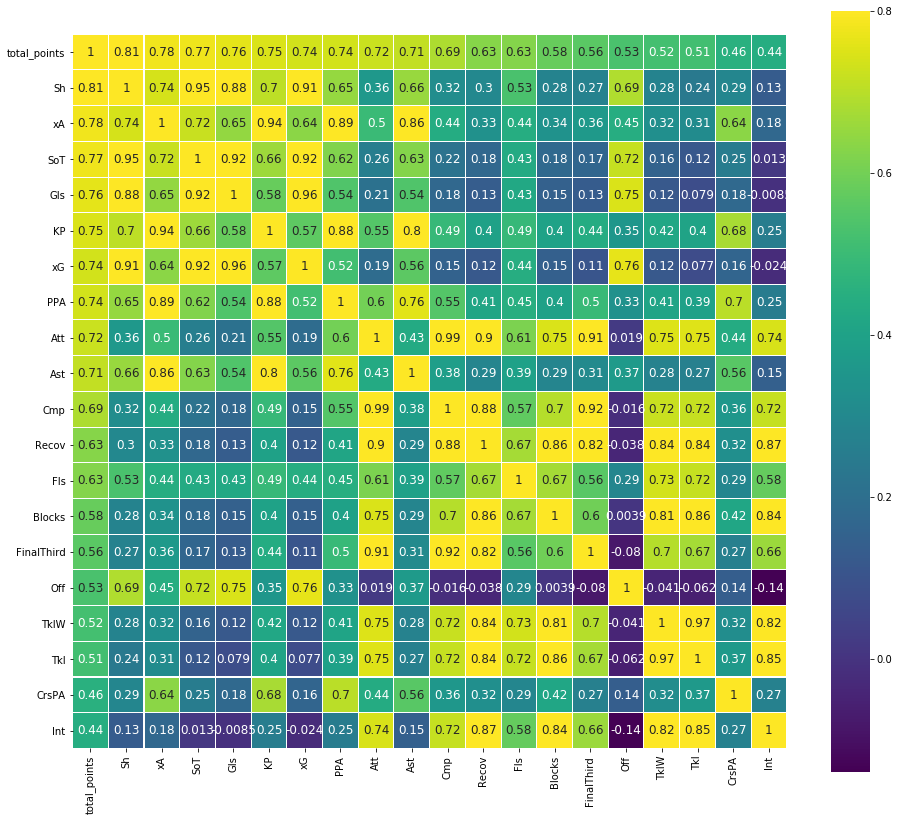

In [146]:
# total_points correlation matrix
k = 20
cols = correlation.nlargest(k, 'total_points')['total_points'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(16,14))
sns.heatmap(cm, vmax=0.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [150]:
cols_to_use = ['Sh','xA','Att','Fls','CrsPA']
X = df[cols_to_use]
y = df.total_points
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lm = LinearRegression()
lm.fit(X_train, y_train)
pred_score = lm.predict(X_test)
print(mean_absolute_error(y_test, pred_score))

12.776826388475456
